In [2]:
import copy

import matplotlib.pyplot as plt
import numpy as np

In [4]:
# House price prediction:
# The training dataset contains three examples with four features (size, bedrooms, floors and, age.

X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [7]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

In [13]:
def predict(x, w, b):
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters
      b (scalar):             model parameter

    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x, w) + b
    return p

In [32]:
x1 = X_train[0,:]

f_wb = predict(x1, w_init, b_init)
print(f"prediction (using optimal w & b): ${f_wb*1000:.4f}")

prediction: $459999.9976


In [20]:
def compute_cost(X, y, w, b):
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost = cost + (f_wb_i - y[i])**2
    cost = cost / (2 * m)
    return cost

In [35]:
def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b.
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [44]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,)) : Updated values of parameters
      b (scalar)       : Updated value of parameter
      """

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(X, y, w, b))

    return w, b, J_history #return final w,b and J history for graphing

In [61]:
initial_w = np.zeros_like(w_init)
initial_b = 0.0

alpha = 5.0e-7
iterations = 1000000

# Run gradient descent:
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print("w_final:", w_final)
print("b_final:", b_final)

w_final: [ 0.23379655  2.63288293 -7.41311843 -1.24930407]
b_final: 0.08736063337565145


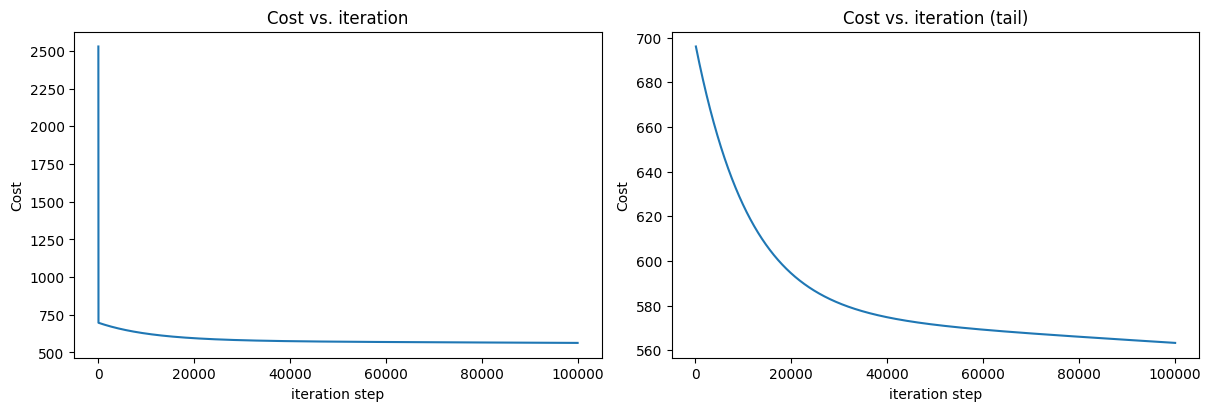

In [62]:
# Visualise gradient descent:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()

In [67]:
initial_w = np.zeros_like(w_init)
initial_b = 0.0

alpha = 5.0e-7
iterations = 10000000

# Run gradient descent to find optimal w and b:
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print("10 million iterations!")

print(f"w_final: {w_final}")
print(f"b_final: {b_final}\n")

# Predictions using found w and b:
m = X_train.shape[0]
for i in range(m):
    predicted_price = np.dot(X_train[i], w_final) + b_final
    print(f"prediction: ${predicted_price:0.2f}K, target value: ${y_train[i]}K")

10 million iterations!
w_final: [  0.18173972  16.29622198 -45.62523857   0.76800375]
b_final: 0.8433498043253992

prediction: $453.64K, target value: $460K
prediction: $246.55K, target value: $232K
prediction: $169.53K, target value: $178K
